In [1]:
'''
【课程2.2】  异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析
异常值处理方法 → 删除 / 修正填补

'''

'\n【课程2.2】  异常值处理\n\n异常值是指样本中的个别值，其数值明显偏离其余的观测值。\n异常值也称离群点，异常值的分析也称为离群点的分析\n\n异常值分析 → 3σ原则 / 箱型图分析\n异常值处理方法 → 删除 / 修正填补\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

均值为0.856,标准差100.347
异常值一共是23条


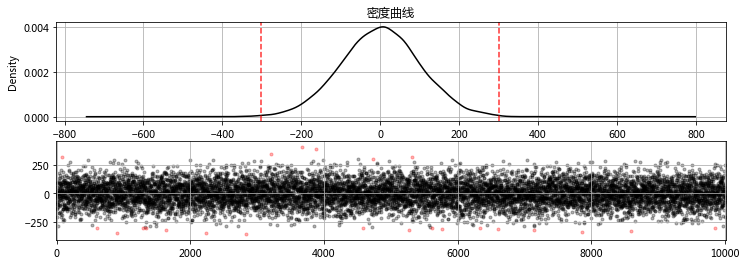

In [8]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)   # 创建数据

u = data.mean()
std = data.std()
stats.kstest(data,'norm',(u,std))              # 正态性检验
print('均值为%.3f,标准差%.3f'%(u,std))

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind='kde',grid=True,style='-k',title='密度曲线')
plt.axvline(3*std,hold=None,color='r',linestyle='--',alpha=0.8)
plt.axvline(-3*std,hold=None,color='r',linestyle='--',alpha=0.8)

ax2 = fig.add_subplot(2,1,2)
error = data[np.abs(data-u)>3*std]
data_c = data[np.abs(data-u) <= 3*std]
print(f'异常值一共是{len(error)}条')
plt.scatter(data_c.index,data_c,color='k',marker='.',alpha=0.3)
plt.scatter(error.index,error,color='r',marker='.',alpha=0.3)
plt.xlim([-10,10010])
plt.grid()

分位差为:133.5167888845129,上限:267.5761076582718,下限:-266.4910478797798
异常值共有78条


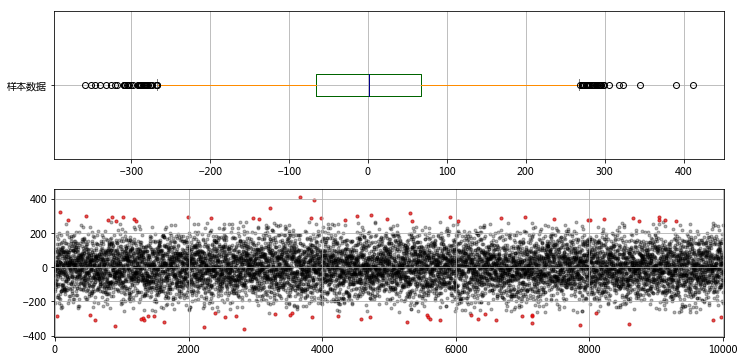

In [14]:
# 异常值分析
# （2）箱型图分析

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid=True,color=color,ax=ax1,label='样本数据')                  # 箱型图看数据分布情况
                                                                                         # 以内限为界
    
s = data.describe()                                                                      # 基本统计量
q1 = s['25%']
q3 = s['75%']
iqr = q3-q1                                                                              # 计算分位差
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print(f'分位差为:{iqr},上限:{ma},下限:{mi}')

ax2 = fig.add_subplot(2,1,2)
error = data[(data < mi) | (data > ma)]
data_c = data[(data >= mi) | (data <= ma)]
print(f'异常值共有{len(error)}条')
plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()